In [4]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [34]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet), maxlen = 30)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet), maxlen = 30)

print("X_train, X_test", X_train.shape, X_test.shape)

labels = train_data.label.unique().tolist()

X_train, X_test (1273862, 30) (318466, 30)


In [35]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1273862, 1)
y_test shape: (318466, 1)


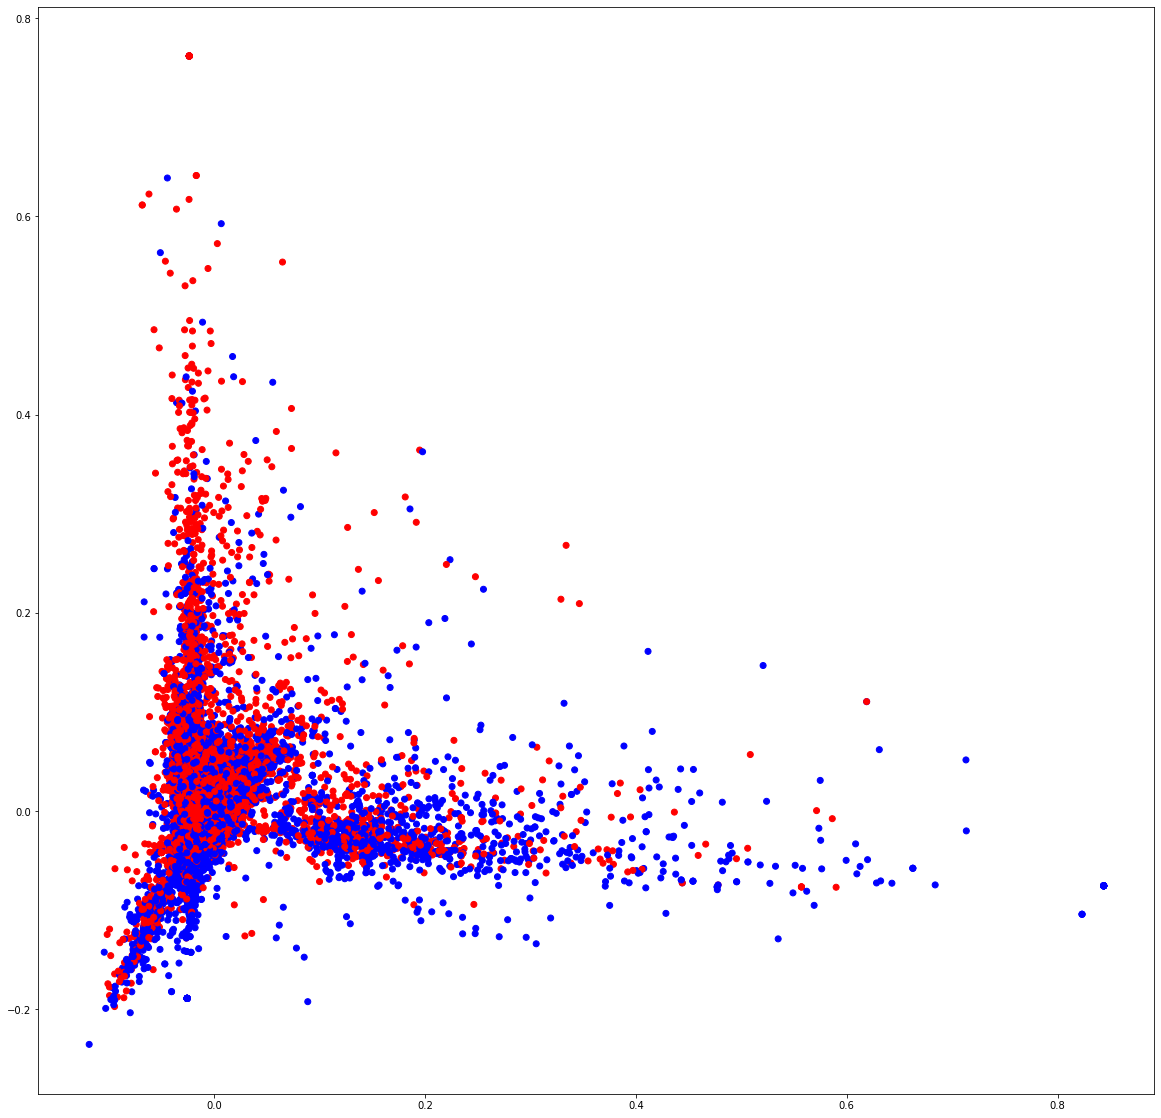

In [44]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

labels_dict = {'Negative':'red', 'Neutral':'gray', 'Positive':'blue'}

def convert_labels(label):
    return labels_dict[label]

first_K_targets = shuffled_df.head(K).label.apply(lambda x: convert_labels(x))


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(first_K_tweets).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.figure(figsize = (20, 20))
plt.scatter(data2D[:,0], data2D[:,1], c=first_K_targets)
plt.show()

# Training

### K-Means

In [42]:
from tensorflow.keras.layers import Conv1D, Bidirectional, K-Means, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [43]:
sequence_input = Input(shape=(30,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(K-Means(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)


model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1, min_lr = 0.01, monitor = 'val_loss', verbose = 1)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [44]:
history = model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
2489/2489 [==============================] - 887s 354ms/step - loss: 0.5378 - accuracy: 0.7247 - val_loss: 0.4957 - val_accuracy: 0.7596
Epoch 2/10
2489/2489 [==============================] - 785s 315ms/step - loss: 0.4859 - accuracy: 0.7636 - val_loss: 0.4719 - val_accuracy: 0.7746
Epoch 3/10
2489/2489 [==============================] - 920s 369ms/step - loss: 0.4737 - accuracy: 0.7724 - val_loss: 0.4623 - val_accuracy: 0.7788
Epoch 4/10
2489/2489 [==============================] - 861s 346ms/step - loss: 0.4674 - accuracy: 0.7759 - val_loss: 0.4655 - val_accuracy: 0.7789
Epoch 5/10
2489/2489 [==============================] - 828s 333ms/step - loss: 0.4612 - accuracy: 0.7797 - val_loss: 0.4603 - val_accuracy: 0.7797
Epoch 6/10
2489/2489 [==============================] - 770s 309ms/step - loss: 0.4589 - accuracy: 0.7818 - val_loss: 0.4557 - val_accuracy: 0.7830
Epoch 7/10
2489/2489 [==============================] - 740s 297ms/step - loss: 0.4563 - accuracy: 0.7830 - val_

In [45]:
model.save('models/K-Means_model.h5')

In [7]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Conv1D, Bidirectional, K-Means, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

model = tf.keras.models.load_model('models/K-Means_model.h5')
model2 = tf.keras.models.load_model('models/K-Means_model_1024batchsize.h5')

# Check its architecture
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 300)           87137400  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 30, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 64)            96064     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0     

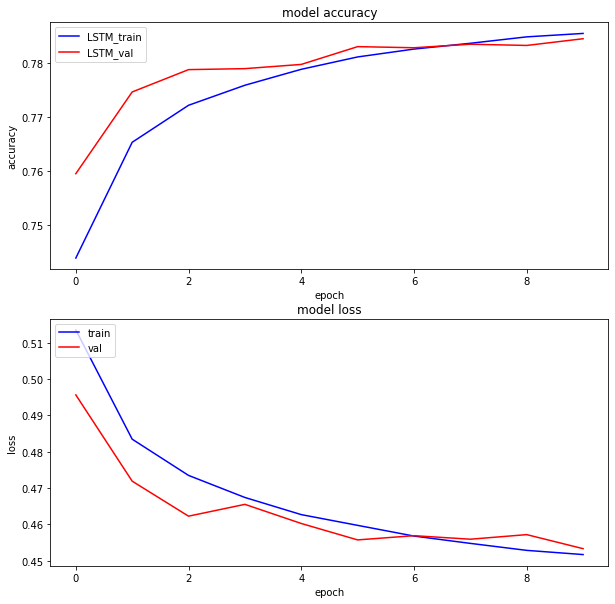

In [60]:
import matplotlib.pyplot as plt

plt1, (plt2, plt3) = plt.subplots(2,1, figsize=(10,10))
plt2.plot(history.history['accuracy'], c= 'blue')
plt2.plot(history.history['val_accuracy'], c='red')
plt2.set_title('model accuracy')
plt2.set_ylabel('accuracy')
plt2.set_xlabel('epoch')
plt2.legend(['K-Means_train', 'K-Means_val'], loc='upper left')

plt3.plot(history.history['loss'], c='blue')
plt3.plot(history.history['val_loss'], c='red')
plt3.set_title('model loss')
plt3.set_ylabel('loss')
plt3.set_xlabel('epoch')
plt3.legend(['train', 'val'], loc='upper left')

In [46]:
def decode_labels(score):
    return "Positive" if score > 0.5 else "Negative"


scores = model.predict(X_test, verbose=1, batch_size=10000)
y_pred = [decode_labels(score) for score in scores]

32/32 [==============================] - 43s 1s/step


### Confusion Matrix

[[125526  33967]
 [ 34675 124298]]


<AxesSubplot:>

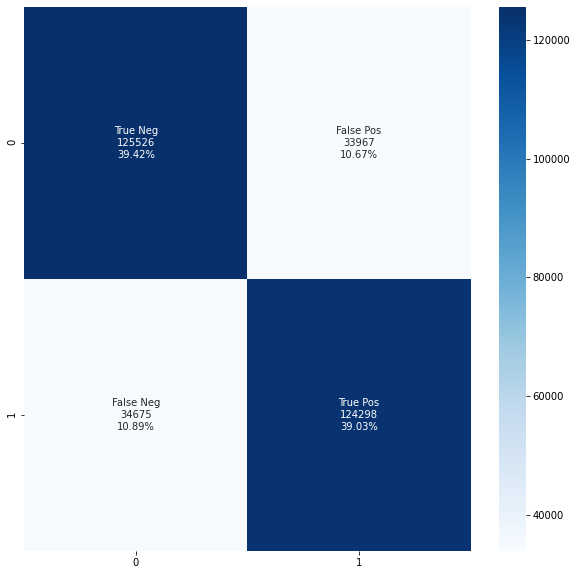

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

cf_matrix = confusion_matrix(test_data.label.to_list(), y_pred)
print(cf_matrix)

plt.figure(figsize = (10,10))

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [47]:
print(classification_report(list(test_data.label), y_pred))

              precision    recall  f1-score   support

    Negative       0.78      0.79      0.79    159493
    Positive       0.79      0.78      0.78    158973

    accuracy                           0.78    318466
   macro avg       0.78      0.78      0.78    318466
weighted avg       0.78      0.78      0.78    318466



In [58]:
def decode_labels(score):
    return "Positive" if score > 0.5 else "Negative"

scores2 = model2.predict(X_test, verbose=1, batch_size=10000)
y_pred2 = [decode_labels(score) for score in scores]

32/32 [==============================] - 35s 1s/step


[[128553  30940]
 [ 38435 120538]]


<AxesSubplot:>

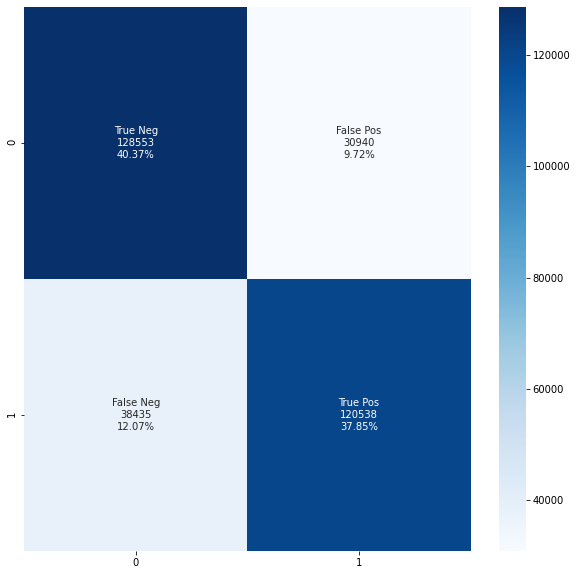

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

cf_matrix = confusion_matrix(test_data.label.to_list(), y_pred2)
print(cf_matrix)

plt.figure(figsize = (10,10))

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [60]:
print(classification_report(list(test_data.label), y_pred2))

              precision    recall  f1-score   support

    Negative       0.77      0.81      0.79    159493
    Positive       0.80      0.76      0.78    158973

    accuracy                           0.78    318466
   macro avg       0.78      0.78      0.78    318466
weighted avg       0.78      0.78      0.78    318466



## ROC - AUC

In [49]:
from sklearn.metrics import roc_curve
y_pred_K-Means1 = model.predict(X_test).ravel()
fpr_K-Means1, tpr_K-Means1, thresholds_K-Means1 = roc_curve(y_test, y_pred_K-Means1)
y_pred_K-Means2 = model2.predict(X_test).ravel()
fpr_K-Means2, tpr_K-Means2, thresholds_K-Means2 = roc_curve(y_test, y_pred_K-Means2)

In [50]:
#AUC calculation
from sklearn.metrics import auc
auc_K-Means1 = auc(fpr_K-Means1, tpr_K-Means1)
auc_K-Means2 = auc(fpr_K-Means2, tpr_K-Means2)

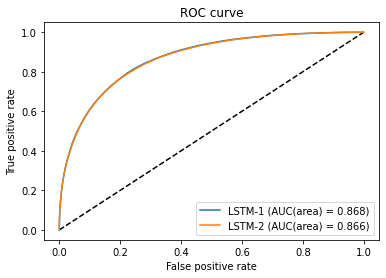

In [53]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_K-Means1, tpr_K-Means1, label='K-Means-1 (AUC(area) = {:.3f})'.format(auc_K-Means1))
plt.plot(fpr_K-Means2, tpr_K-Means2, label='K-Means-2 (AUC(area) = {:.3f})'.format(auc_K-Means2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()